# Number of paths in random graph, number of paths in brain (as random graph)

## Galen Wilkerson

https://math.stackexchange.com/questions/424887/in-a-random-graph-of-n-vertices-what-is-the-expected-value-of-the-number-of-s

Number of simple paths between node $u$ and $v$ is:


Given any simple path between $u,v$ of length $l$, the expected number of times that it will be a path is
$(\frac12)^l$. 

(if the connection probability $p$ is 1/2), otherwise it will be $p^l$.)

Hence we need to sum over all such paths between 2 vertices $u,v$.

Fix $k$:

Number of paths of length $k + 1$:

$k + 2$ vertices involved, including $u$ and $v$.  
Pick $k$ of the remaining $n-2$ vertices.  
The order that the remaining vertices are picked matter, 
so there are $(n-2)^k = k! {n - 2 \choose k}$ simple paths of length $k + 1$ 
between vertices $u$ and $v$, giving us that 

Therefore, the **total number of simple paths between all nodes** between all choices of $u, v$ will be:

$$
E[X] = {n \choose 2} \Big[ \sum_{k = 0}^{n - 2} k! {n - 2 \choose k} \times \frac{1}{2^{k + 1}} \Big]
$$

if we rewrite for $p$, the edge probability, we get:
$$
E[X] = {n \choose 2} \Big[ \sum_{k = 0}^{n - 2} k! {n - 2 \choose k} \times p^{k + 1} \Big]
$$

In [1]:
from scipy.special import comb
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

%matplotlib notebook

def expected_number_of_simple_paths(n = 10, p = .5):
    
    number_of_node_pairs = comb(n, 2, exact=True)
    k = np.arange(0, n - 1)
    k_fact = factorial(k)
    number_of_paths = np.sum(k_fact * comb(n - 2, k) * p**(k + 1))
    
    return(number_of_paths)

# numpy vectorized version of the function
expected_number_of_simple_paths_vect = np.vectorize(expected_number_of_simple_paths)

def compute_expected_number_of_edges(N, p):
    '''
    Given N nodes, edge probability p, 
    compute the expected number of edges in a random graph
    '''
    
    N_choose_2 = comb(N, 2)
    E = p * N_choose_2
    return(E)

def compute_edge_probability(N, E):
    '''
    Given N nodes, E edges, compute the edge probability in a random graph
    '''
    
    N_choose_2 = comb(N, 2)
    p = E/N_choose_2
    return(p)

bShowInline = True  # Set = False for document generation

# Log-log plot of estimated number of paths

In [10]:
p = .#2.00e-08
n_max = 10

ns = np.arange(n_max)
ps = [p] * len(ns)
fact = factorial(ns)
expon = np.power(np.e,ns)

#fig = plt.figure()

fig, ax = plt.subplots()
# ...
fig.tight_layout()

plt.loglog(ns, fact, label = 'n!')
plt.loglog(ns, expon, label = '$e^n$')
plt.loglog(ns, expected_number_of_simple_paths_vect(ns, ps), label = 'number of simple paths');
plt.title('log log: number of paths in random graph vs. n, for p = ' + str(p));
plt.xlabel('log number of nodes (n)')
plt.ylabel('log estimated number of paths');
plt.legend();


# center text
fig.text(x = 1, y=5, s='$\Big(\frac{n!}{k! (n-k)!}\Big)$', ha='center')
fig.tight_layout()
plt.subplots_adjust(bottom=.2)

# resize the figure to match the aspect ratio of the Axes    
#fig.subplots_adjust(bottom=2) # or whatever

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb253f58d90> (for post_execute):


ValueError: 
\Big(rac{n!}{k! (n-k)!}\Big)
^
Unknown symbol: \Big (at char 0), (line:1, col:1)

ValueError: 
\Big(rac{n!}{k! (n-k)!}\Big)
^
Unknown symbol: \Big (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

# Try varying p instead

/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in multiply
  
/home/galen/miniconda3/envs/python_3_6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


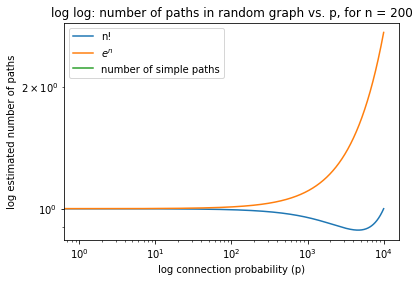

In [3]:
n_max = 200

ps = np.arange(.0001, .9999, 0.0001) 
ns = [n_max] * len(ps)
fact = factorial(ps)
expon = np.power(np.e,ps)

plt.figure()
plt.loglog(fact, label = 'n!')
plt.loglog(expon, label = '$e^n$')
plt.loglog(ps, expected_number_of_simple_paths_vect(ns, ps), label = 'number of simple paths');
plt.title('log log: number of paths in random graph vs. p, for n = ' + str(n_max));
plt.xlabel('log connection probability (p)')
plt.ylabel('log estimated number of paths');
plt.legend();

# An example graph

799
expected number of edges 796.0


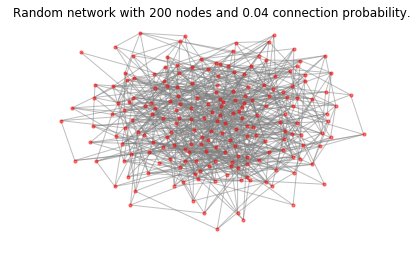

In [4]:
import networkx as nx

p = 0.04

G = nx.erdos_renyi_graph(n_max, p)

plt.figure()
plt.title('Random network with ' + str(n_max) + ' nodes and ' + str(p) + ' connection probability.')
nx.draw(G, node_size=10, edge_color='grey', alpha=.5);
print(G.number_of_edges())
print('expected number of edges', compute_expected_number_of_edges(n_max, p))

# Number of paths in brain

If we use some basic statistics about the brain:

"
Each of the $10^{11}$ (one hundred billion) neurons has on average 7000 synaptic connections to other neurons.
It has been estimated that the brain of a three-year-old child has about $10^{15}$ synapses (1 quadrillion).
"

Therefore, we have $N = 10^{11}$ and $E = 10^{15}$.

Since we know that the expected number of edges is given by

$$
E = p {n \choose 2} 
$$

$$
p = \frac{E} {n \choose 2} = \frac{E}{\Big(\frac{n!}{k! (n-k)!}\Big)}
$$



In [5]:
N = 10e11
E = 10e15

p = compute_edge_probability(N, E)
p

2.0000000000019998e-08

## This function fails with a memory error

In [6]:
expected_number_of_simple_paths_vect(N, p)

MemoryError: 

In [7]:
all_paths = list(nx.shortest_paths.all_pairs_shortest_path(G=G))
len(all_paths[2])

2

In [8]:
all_paths[0][1]

{0: [0],
 49: [0, 49],
 68: [0, 68],
 135: [0, 135],
 169: [0, 169],
 171: [0, 171],
 54: [0, 49, 54],
 58: [0, 49, 58],
 93: [0, 49, 93],
 102: [0, 49, 102],
 114: [0, 49, 114],
 163: [0, 49, 163],
 180: [0, 49, 180],
 184: [0, 49, 184],
 10: [0, 68, 10],
 25: [0, 68, 25],
 34: [0, 68, 34],
 79: [0, 68, 79],
 89: [0, 68, 89],
 133: [0, 68, 133],
 142: [0, 68, 142],
 145: [0, 68, 145],
 164: [0, 68, 164],
 64: [0, 135, 64],
 70: [0, 135, 70],
 124: [0, 135, 124],
 4: [0, 169, 4],
 14: [0, 169, 14],
 56: [0, 169, 56],
 81: [0, 169, 81],
 83: [0, 169, 83],
 104: [0, 169, 104],
 111: [0, 169, 111],
 116: [0, 169, 116],
 120: [0, 169, 120],
 139: [0, 169, 139],
 198: [0, 169, 198],
 29: [0, 171, 29],
 91: [0, 171, 91],
 99: [0, 171, 99],
 156: [0, 171, 156],
 27: [0, 49, 54, 27],
 60: [0, 49, 54, 60],
 128: [0, 49, 54, 128],
 148: [0, 49, 54, 148],
 183: [0, 49, 54, 183],
 191: [0, 49, 54, 191],
 194: [0, 49, 54, 194],
 11: [0, 49, 58, 11],
 22: [0, 49, 58, 22],
 85: [0, 49, 58, 85],
 137: